<a href="https://colab.research.google.com/github/Kae1thas/ML-24/blob/main/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Загрузка данных

Скачаем данные из репозитория UCI, а затем загрузим их в Google Colab.

In [1]:
import numpy as np

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = np.genfromtxt(url, delimiter=",")

print(data[:5])

[[5.1 3.5 1.4 0.2 nan]
 [4.9 3.  1.4 0.2 nan]
 [4.7 3.2 1.3 0.2 nan]
 [4.6 3.1 1.5 0.2 nan]
 [5.  3.6 1.4 0.2 nan]]


# 2. Анализ структуры данных

При использовании метода genfromtxt() пятый столбец содержит NaN. Это связано с тем, что это текстовые данные, а genfromtxt() по умолчанию пытается конвертировать все данные в числовой формат. Текст не может быть преобразован в число, и поэтому возникает NaN.Чтобы избежать этого, можно явно указать тип данных:

In [2]:
structured_data = np.genfromtxt(
    url,
    delimiter=",",
    dtype=[('sepal_length', 'f8'),
           ('sepal_width', 'f8'),
           ('petal_length', 'f8'),
           ('petal_width', 'f8'),
           ('class', 'U20')],
    encoding=None
)

print(structured_data[:5])


[(5.1, 3.5, 1.4, 0.2, 'Iris-setosa') (4.9, 3. , 1.4, 0.2, 'Iris-setosa')
 (4.7, 3.2, 1.3, 0.2, 'Iris-setosa') (4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
 (5. , 3.6, 1.4, 0.2, 'Iris-setosa')]


# 3. Анализ типов данных

Извлек пятый столбец и провел анализ типов данных:

In [3]:
labels = structured_data['class']
print("Метки классов:", np.unique(labels))


Метки классов: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# 4. Визуализация данных

Для визуализации используем библиотеку matplotlib. Построим несколько парных графиков, чтобы увидеть, как данные распределены в проекциях.

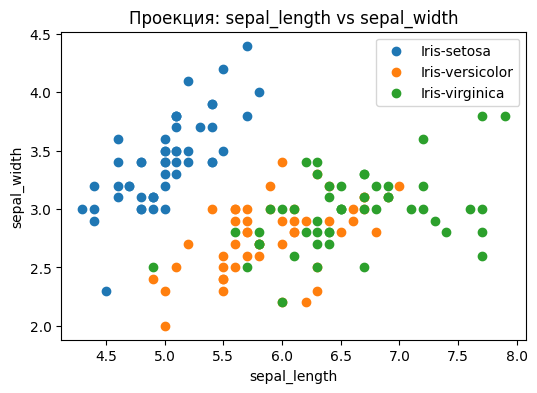

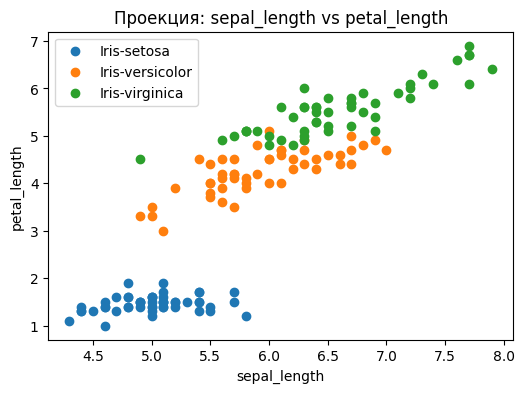

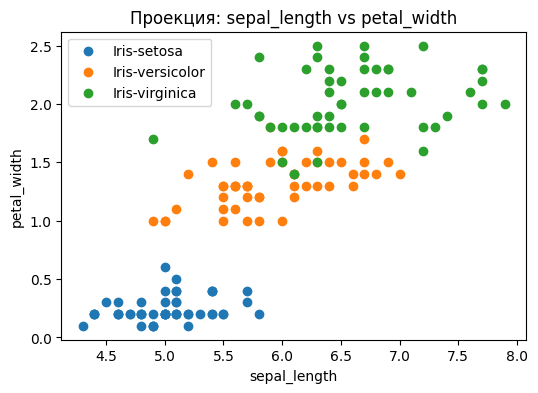

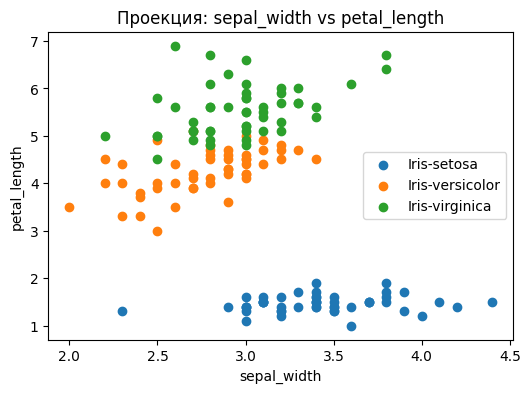

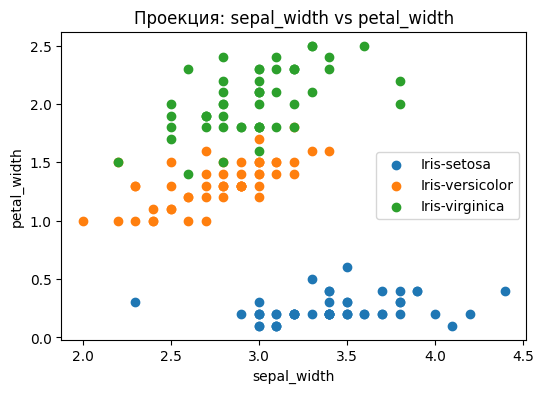

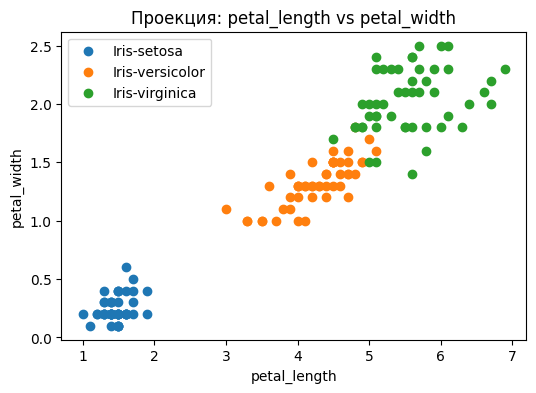

In [5]:
import matplotlib.pyplot as plt

numerical_data = np.array([
    [row['sepal_length'], row['sepal_width'], row['petal_length'], row['petal_width']]
    for row in structured_data
])

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Построение парных графиков
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure(figsize=(6, 4))
        for label in np.unique(labels):
            plt.scatter(
                numerical_data[labels == label, i],
                numerical_data[labels == label, j],
                label=label
            )
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.legend()
        plt.title(f"Проекция: {features[i]} vs {features[j]}")
        plt.show()


Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           625 non-null    object 
 1   left-distance   625 non-null    float64
 2   left-weight     625 non-null    float64
 3   right-distance  625 non-null    float64
 4   right-weight    625 non-null    float64
dtypes: float64(4), object(1)
memory usage: 24.5+ KB
None

Первые строки набора данных:
  class  left-distance  left-weight  right-distance  right-weight
0     B            1.0          1.0             1.0           1.0
1     R            1.0          1.0             1.0           2.0
2     R            1.0          1.0             1.0           3.0
3     R            1.0          1.0             1.0           4.0
4     R            1.0          1.0             1.0           5.0

Распределение целевого признака (class):
class
R    288
L    2

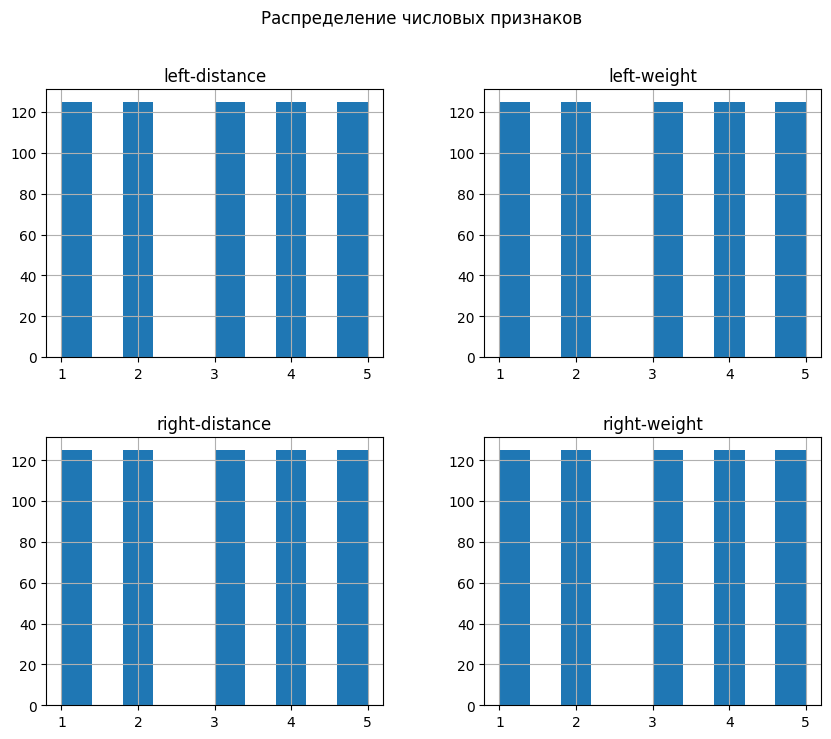

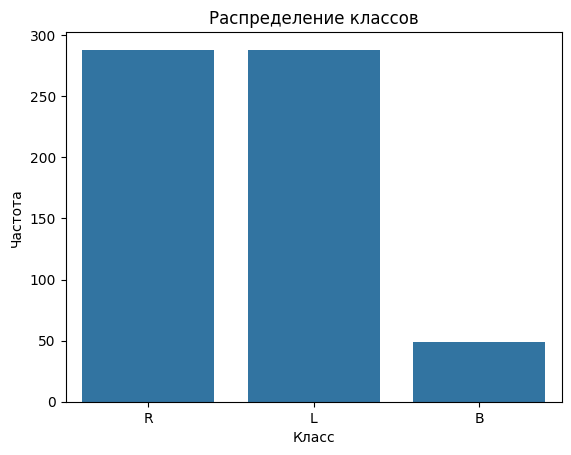

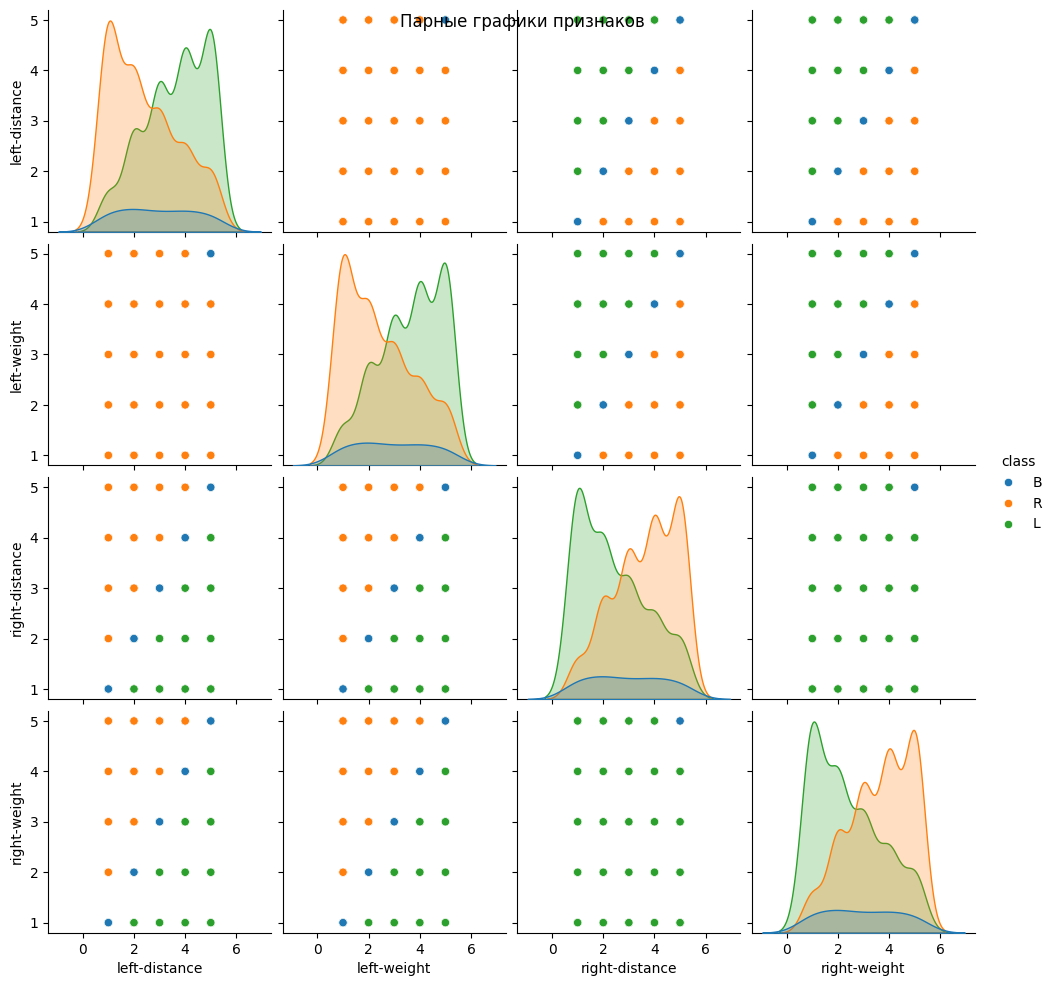

Всего можно построить 6 различных проекций для анализа.


In [15]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
data = np.genfromtxt(url, delimiter=',', dtype=str)

# Преобразование данных в DataFrame для удобства анализа
columns = ["class", "left-distance", "left-weight", "right-distance", "right-weight"]
df = pd.DataFrame(data, columns=columns)

# Преобразование числовых столбцов к float
numeric_cols = ["left-distance", "left-weight", "right-distance", "right-weight"]
df[numeric_cols] = df[numeric_cols].astype(float)

# 2. Анализ структуры данных
print("Общая информация о наборе данных:")
print(df.info())

print("\nПервые строки набора данных:")
print(df.head())

# Частоты целевого признака
print("\nРаспределение целевого признака (class):")
print(df["class"].value_counts())

# 3. Первичный анализ данных
print("\nОсновные статистики числовых признаков:")
print(df.describe())

# 4. Визуализация

# Гистограммы числовых признаков
df[numeric_cols].hist(figsize=(10, 8), bins=10)
plt.suptitle("Распределение числовых признаков")
plt.show()

# Диаграммы распределения целевого признака
sns.countplot(x='class', data=df, order=df["class"].value_counts().index)
plt.title("Распределение классов")
plt.xlabel("Класс")
plt.ylabel("Частота")
plt.show()

# Парные графики (scatterplots) между признаками
sns.pairplot(df, hue="class")
plt.suptitle("Парные графики признаков")
plt.show()

# 5. Выводы
num_features = len(numeric_cols)
num_projections = (num_features * (num_features - 1)) // 2
print(f"Всего можно построить {num_projections} различных проекций для анализа.")
